In [1]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *

from manifold import *

save_fold = 'report/images/'

n_orbits = 100

In [2]:
def EPS(S, tol):
    # Poincare section at x = 1 - mu
    x_s = 1 - muEM
    # In theory we place the section plane at x and call it a day, 
    # but in practice we need to account for the fact that the section
    # cannot be infinite on the y axis or it catches unwanted solutions
    # So we limit y to +/- 0.25, well inside the ZVC at 1-mu

    y_lim = 0.25

    # Compute the distance to the section
    dist_x = np.abs(S[0] - x_s)
    dist_y = np.abs(S[1] - y_lim)

    if dist_x < tol and abs(S[1]) < y_lim:
        return True
    else:
        return False
    
def EPS2(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [0.5 1-mu]
    x_lim_i = 0.5
    x_lim_s = 1-muEM

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False

def EPS3(S, tol):
    # Poincare section at y = 0
    # We limit the x axis to a range [1-mu 1.2]
    x_lim_i = 1-muEM
    x_lim_s = 2

    # Compute the distance to the section
    if abs(S[1]) < tol and S[0] > x_lim_i and S[0] < x_lim_s:
        return True
    else:
        return False


In [3]:
# Load orbits from file
L1_0 = load_orbit("out/L1_0.npz")
L1_1 = load_orbit("out/L1_1.npz")

L2_0 = load_orbit("out/L2_0.npz")
L2_1 = load_orbit("out/L2_1.npz")

L1_orbits = [L1_0, L1_1]
L2_orbits = [L2_0, L2_1]

In [4]:
manL1 = Manifold(L1_0)
_ = manL1.compute_manifold(n_orbits)

In [5]:
manL2 = Manifold(L2_0)
_ = manL2.compute_manifold(n_orbits)

In [6]:
cutsL1, sursL1, cutuL1, suruL1 = manL1.surface_hit(EPS, 1e-3)

cutsL2, sursL2, cutuL2, suruL2 = manL2.surface_hit(EPS, 2e-3)

In [32]:
# Plot the cuts
plt.figure()
for i in range(100):
    if i == 0:
        plt.plot(sursL1[i][0], sursL1[i][1], "c", label="Stable manifold")
        plt.plot(suruL1[i][0], suruL1[i][1], "m", label="Unstable manifold")
    else:
        plt.plot(cutsL1[i][0], cutsL1[i][1], "c",)
        plt.plot(cutuL1[i][0], cutuL1[i][1], "m",)


manL1.plot_ZVC()
plt.axis("equal")
plt.plot([1-muEM], [0], "ko")
plt.title("Manifold cuts at L1")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()

plt.savefig(save_fold + "manifold_L1.png")
plt.show()

In [37]:
plt.figure()
for i in range(100):
    if i == 0:
        plt.plot(sursL2[i][0], sursL2[i][1], "r", label="Stable manifold")
        plt.plot(suruL2[i][0], suruL2[i][1], "b", label="Unstable manifold")
    else:

        plt.plot(cutsL2[i][0], cutsL2[i][1], "r",)
        plt.plot(cutuL2[i][0], cutuL2[i][1], "b",)

manL2.plot_ZVC()
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Manifold cuts at L2")
# Place legen top right
plt.legend(loc='upper right')
plt.savefig(save_fold + "manifold_L2.png")
plt.plot([1-muEM], [0], "ko")
plt.show()

### [X M E]

In [35]:
plt.figure()
for i in range(100):
    if i == 0:
        plt.plot(cutsL1[i][0], cutsL1[i][1], "c", label="Stable L1")
        plt.plot(cutuL1[i][0], cutuL1[i][1], "m", label="Unstable L1")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "r", label="Stable L2")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "b", label="Unstable L2")
    else:
        plt.plot(cutsL1[i][0], cutsL1[i][1], "c")
        plt.plot(cutuL1[i][0], cutuL1[i][1], "m")
        plt.plot(cutsL2[i][0], cutsL2[i][1], "r")
        plt.plot(cutuL2[i][0], cutuL2[i][1], "b")
manL1.plot_ZVC()
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.6, 1.4)
plt.ylim(-0.3, 0.3)
plt.legend()
plt.title("[X M E] manifold")
plt.savefig(save_fold + "manifold_XME.png")
plt.show()

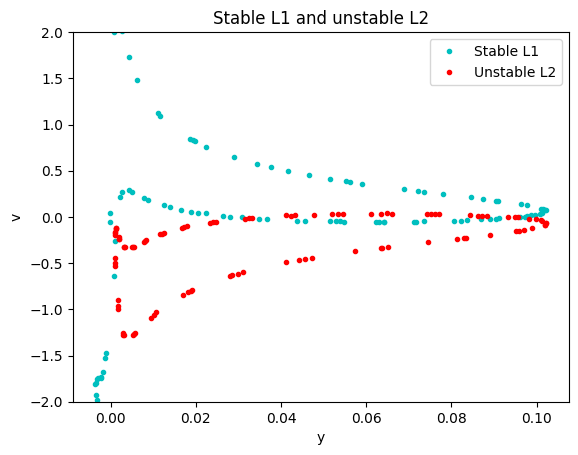

In [10]:
# Plots suruL2 and sursL1
plt.figure()
# Plot y-v
plt.plot(sursL1[:, 1], sursL1[:, 3], "co", label="Stable L1", markersize=3)
plt.plot(suruL2[:, 1], suruL2[:, 3], "ro", label="Unstable L2", markersize=3)
plt.xlabel("y")
plt.ylabel("v")
plt.legend()
plt.title("Stable L1 and unstable L2")

plt.ylim(-2,2)
# plt.savefig(save_fold + "XME_yv.png")
plt.show()


### [E M E]

In [11]:
cutsL1_EPS3, sursL1_EPS3, cutuL1_EPS3, suruL1_EPS3 = manL1.surface_hit(EPS3, 1e-3)

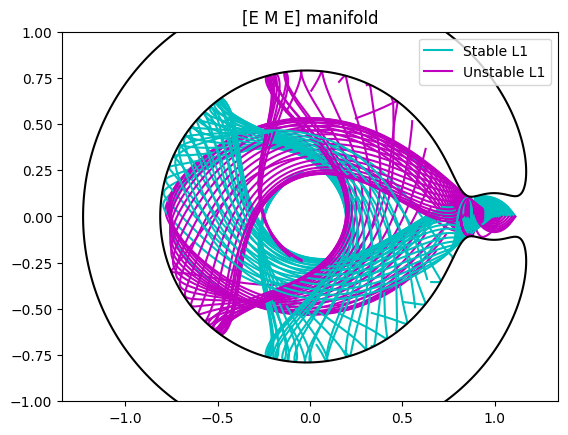

In [12]:
plt.figure()    
for i in range(50):
    if i == 0:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c", label="Stable L1")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m", label="Unstable L1")
    else:
        plt.plot(cutsL1_EPS3[i][0], cutsL1_EPS3[i][1], "c")
        plt.plot(cutuL1_EPS3[i][0], cutuL1_EPS3[i][1], "m")
manL1.plot_ZVC()
plt.legend()
plt.axis("equal")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("[E M E] manifold")
# plt.savefig(save_fold + "manifold_EME.png")
plt.show()   

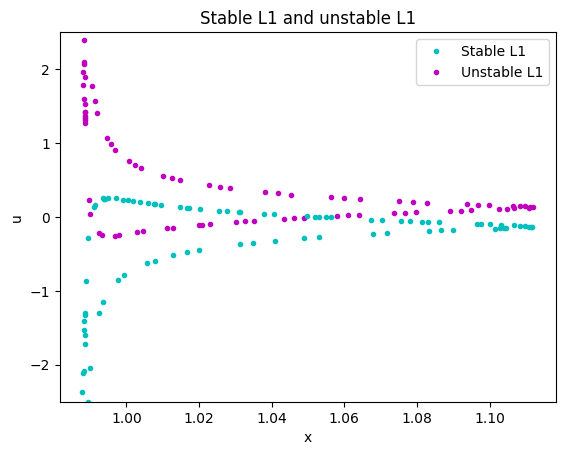

In [13]:


sursL1_EPS3 = [sursL1_EPS3[i] for i in range(len(sursL1_EPS3)) if abs(sursL1_EPS3[i][2]) < 10]
suruL1_EPS3 = [suruL1_EPS3[i] for i in range(len(suruL1_EPS3)) if abs(suruL1_EPS3[i][2]) < 10]
plt.figure()
for i in range(len(suruL1_EPS3)):
    if i == 0:
        plt.plot(sursL1_EPS3[i][0], sursL1_EPS3[i][2], "co", markersize=3,label="Stable L1")
        plt.plot(suruL1_EPS3[i][0], suruL1_EPS3[i][2], "mo",markersize=3, label="Unstable L1")
    else:
        plt.plot(sursL1_EPS3[i][0], sursL1_EPS3[i][2], "co", markersize=3)
        plt.plot(suruL1_EPS3[i][0], suruL1_EPS3[i][2], "mo",  markersize=3)

plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.ylim(-2.5, 2.5) 
plt.title("Stable L1 and unstable L1")
# plt.savefig(save_fold + "EME_xu.png")

plt.show()

In [14]:
# x = 1 - y = 0 
# u = 0 --> v from Jacobi
C = L1_0.C
x0 = 1
y0 = 0
u0 = 0

U_ = U([x0, y0], muEM)
v0 = np.sqrt(-(C - 2*U_ + u0**2))

point0 = np.array([x0, y0, u0, v0])



In [15]:
PHI0 = np.eye(4)
X0 = np.concatenate((point0, PHI0.flatten()))
T = L1_0.Yd[2]

sol_eme_f = solve_ivp(fdyn, [0, T], X0, args = (T, muEM), method="LSODA", rtol=1e-12, atol=1e-12)
sol_eme_b = solve_ivp(fdyn,  [0, -T], X0, args = (T, muEM), method="LSODA", rtol=1e-12, atol=1e-12)

In [44]:
plt.figure()
plt.plot(sol_eme_f.y[0,0], sol_eme_f.y[1,0], 'c.') # Forward 
plt.plot(sol_eme_f.y[0], sol_eme_f.y[1], "m")

plt.plot(sol_eme_b.y[0,0], sol_eme_b.y[1,0], 'm.') # Forward 
plt.plot(sol_eme_b.y[0], sol_eme_b.y[1], "c")
manL1.plot_ZVC()
plt.axis("equal")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(1-muEM, 0, 'bo')   
plt.plot(-muEM, 0, 'ko')
plt.xlim(0.8,1)
plt.ylim(-0.1,0.1)
plt.savefig(save_fold + "EME_traj_z.png")
plt.show()

### [X M X]

In [17]:
cutsL2_EPS2, sursL2_EPS2, cutuL2_EPS2, suruL2_EPS2 = manL2.surface_hit(EPS2, 1e-3)

In [33]:
plt.figure()
for i in range(len(cutsL2_EPS2)):
    if i == 0:
        plt.plot(cutsL2_EPS2[i][0], cutsL2_EPS2[i][1], "r", label="Stable L2")
        plt.plot(cutuL2_EPS2[i][0], cutuL2_EPS2[i][1], "b", label="Unstable L2")
    else:

        plt.plot(cutsL2_EPS2[i][0], cutsL2_EPS2[i][1], "r")
        plt.plot(cutuL2_EPS2[i][0], cutuL2_EPS2[i][1], "b")
plt.plot([1-muEM], [0], "ko")
plt.xlim(0.8, 1.4)
plt.ylim(-0.3, 0.3)

manL2.plot_ZVC()
plt.title("[X M X] manifold")
plt.legend()
plt.savefig(save_fold + "manifold_XMX.png")
plt.show()

In [30]:
%matplotlib 

plt.figure()
for i in range(len(sursL2_EPS2)):
    if i == 0:
        plt.plot(sursL2_EPS2[i][0], sursL2_EPS2[i][2], "bo",markersize=3, label="Stable L2")
        plt.plot(suruL2_EPS2[i][0], suruL2_EPS2[i][2], "ro",markersize=3, label="Unstable L2")
    else:
        plt.plot(sursL2_EPS2[i][0], sursL2_EPS2[i][2], "ro", markersize=3)
        plt.plot(suruL2_EPS2[i][0], suruL2_EPS2[i][2], "bo", markersize=3)
plt.ylim(-1.5, 1.5)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

plt.title("Stable L2 and unstable L2")
# plt.savefig(save_fold + "XMX_xu.png")
plt.show()



Using matplotlib backend: qtagg


In [38]:
# x = 0.96 - y = 0
# u = 0 --> v from Jacobi

x0 = 0.96
y0 = 0
u0 = 0

U_ = U([x0, y0], muEM)
v0 = -np.sqrt(-(C - 2*U_ + u0**2))

point0 = np.array([x0, y0, u0, v0])

PHI0 = np.eye(4)
X0 = np.concatenate((point0, PHI0.flatten()))
T = L2_0.Yd[2]

sol_xmx_f = solve_ivp(fdyn, [0, T], X0, args = (T, muEM), method="LSODA", rtol=1e-12, atol=1e-12)
sol_xmx_b = solve_ivp(fdyn,  [0, -T], X0, args = (T, muEM), method="LSODA", rtol=1e-12, atol=1e-12)


In [49]:

plt.figure()
plt.plot(sol_xmx_f.y[0,0], sol_xmx_f.y[1,0], 'b.') # Forward
plt.plot(sol_xmx_f.y[0], sol_xmx_f.y[1], "b")

plt.plot(sol_xmx_b.y[0,0], sol_xmx_b.y[1,0], 'r.') # Forward
plt.plot(sol_xmx_b.y[0], sol_xmx_b.y[1], "r")
manL2.plot_ZVC()
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(1-muEM, 0, 'bo')
plt.plot(-muEM, 0, 'ko')
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.3)

plt.savefig(save_fold + "XMX_traj_z.png")

plt.show()
